In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

In [2]:
tf.reset_default_graph()

# task 1 data generator
with tf.name_scope('generator'):
    x = tf.placeholder(tf.float32, shape=(), name='x')
    y = tf.placeholder(tf.float32, shape=(), name='y')

# task 2 regression
m = tf.get_variable('m', initializer=.1)
b = tf.get_variable('b', initializer=.1)
with tf.name_scope('estimator'):
    with tf.name_scope('delta'):
        delta = .005 * (y - (m * x + b))
    update_m = tf.assign(m, m + delta * x, name='assign_m')
    update_b = tf.assign(b, b + delta, name='assign_b')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for _ in range(1000):
        x_hat = np.random.uniform(-10, 10)
        eta_hat = np.random.uniform(-1, 1)
        y_hat = -6.7 * x_hat + 2 + eta_hat
        sess.run([update_m, update_b], {x: x_hat, y: y_hat})

    print('I guess the line is: y = {}*x + {}'.format(*sess.run([m, b])))

    writer = tf.summary.FileWriter('tf_logs', sess.graph)
    writer.close()

I guess the line is: y = -6.725244522094727*x + 1.9715590476989746


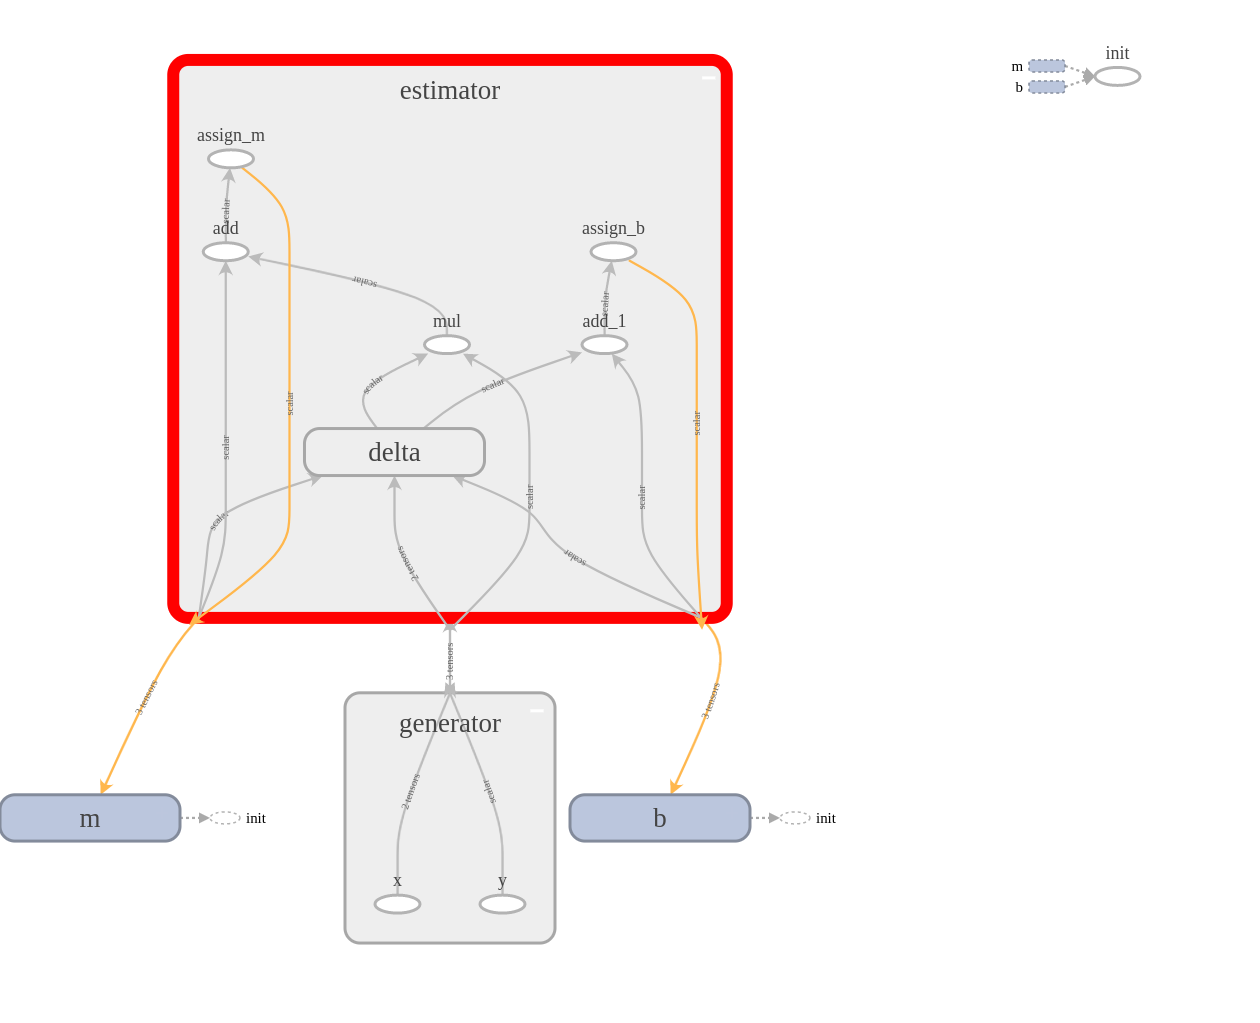

In [3]:
# screenshot from tensorboard of task 1-2
Image(filename='task12.png')

In [4]:
# task 3

tf.reset_default_graph()

with tf.name_scope('generator'):
    x = tf.placeholder(tf.float32, shape=(3,), name='x')
    y = tf.placeholder(tf.float32, shape=(), name='y')

beta = tf.get_variable('beta', initializer=[0., 0., 0.])
with tf.name_scope('estimator'):
    with tf.name_scope('delta'):
        delta = .005 * (y - tf.reduce_sum(x * beta)) * x
    update_beta = tf.assign(beta, beta + delta, name='assign_beta')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for _ in range(1000):
        x_hat = np.append(np.random.uniform(-10, 10, size=(2,)), [1])
        eta_hat = np.random.uniform(-1, 1)
        y_hat = np.dot([-2.3, 4.5, 9.4], x_hat)
        sess.run(update_beta, {x: x_hat, y: y_hat})

    print('I guess beta is: {}'.format(sess.run(beta)))

    writer = tf.summary.FileWriter('tf_logs', sess.graph)
    writer.close()

I guess beta is: [-2.29987097  4.50073719  9.33513546]


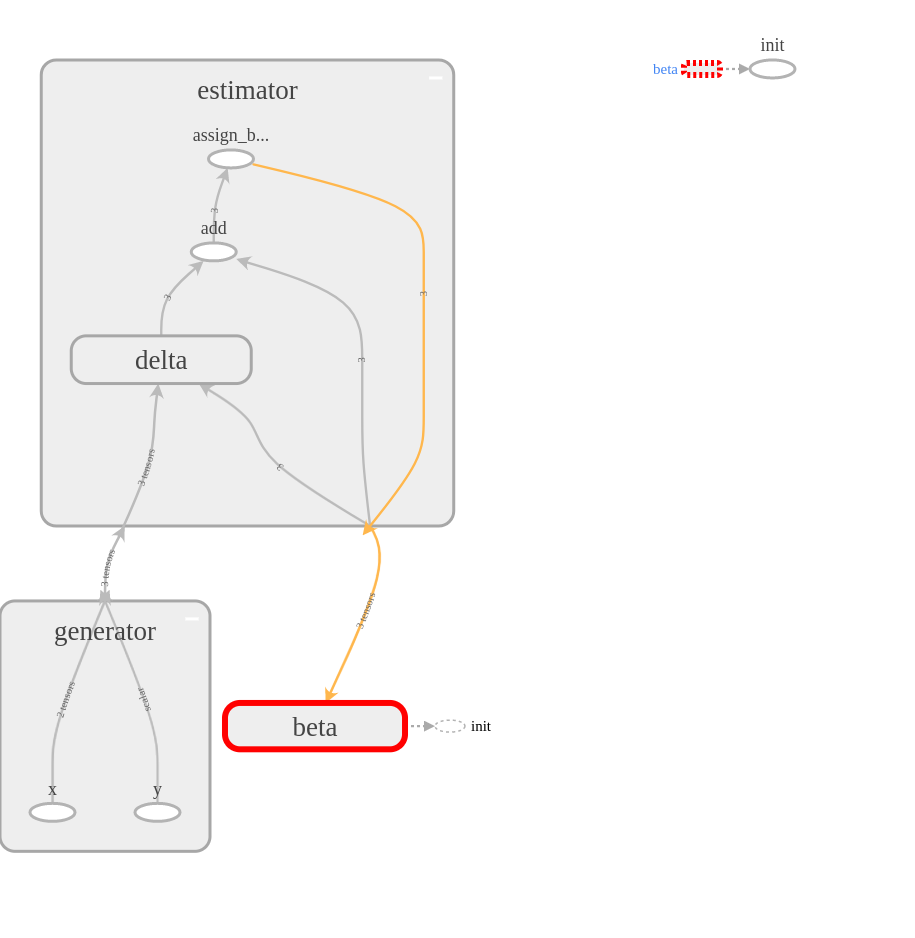

In [5]:
# screenshot of tensorboard for task 3
Image(filename='task3.png')

In [6]:
# task 4

tf.reset_default_graph()

data = np.genfromtxt('foo.csv', delimiter=',', skip_header=1)

with tf.name_scope('generator'):
    x = tf.placeholder(tf.float32, shape=(3,), name='x')
    y = tf.placeholder(tf.float32, shape=(), name='y')

beta = tf.get_variable('beta', initializer=[0., 0., 0.])
with tf.name_scope('estimator'):
    with tf.name_scope('delta'):
        delta = .005 * (y - tf.reduce_sum(x * beta)) * x
    update_beta = tf.assign(beta, beta + delta, name='assign_beta')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for x1, x2, y_hat in data:
        sess.run(update_beta, {x: [x1, x2, 1], y: y_hat})

    print('I guess beta is: {}'.format(sess.run(beta)))

    writer = tf.summary.FileWriter('tf_logs', sess.graph)
    writer.close()

# output should be close to [-7.8, 2.7, .8]

I guess beta is: [-7.79050541  2.69579983  0.83829123]


In [7]:
# screen shot for 3 is pretty much the same as for task 4 - we just changed the data source